<a id='intro'></a>
## Introduction 

> We will be analyzing the tmdb movies Database from This data set contains informationabout 10,000 movies collected from
the Movie Database (TMDb), including user ratings and revenue. This data has relevant details on the movies ranging from title to their earnings as mentioned below. I will focus on the Genre based Analysis and also revenue based analysis to examine if the dataset can indicate what goes into making a successful movie. Primary fields that may help in this analysis mentioned below:

        >original_title
        >genres
        >revenue_adj
        >revenue
        >budget
        >popularity


         Questions for Analysis: 
          >Which genres are most popular from year to year? 
          >What kinds of genre and other details associated with movies that have high revenues?
          >Do high budget movies always make more money?
          >Popularity vs count of movies made in the database to understand if genres are selected based on popularity?
          >Runtimes compared to revnue to check if any insights can be derived



# Project: Investigate the TMDB movie database to delve into what makes a  successful movie

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [31]:
df['release_year'].value_counts()

2014    680
2013    639
2015    617
2012    571
2011    524
2009    519
2008    483
2010    472
2007    417
2006    395
2005    353
2004    300
2003    279
2002    259
2001    238
2000    219
1999    219
1998    198
1996    189
1997    187
1994    182
1993    171
1995    168
1988    138
1989    129
1991    129
1992    126
1990    123
1987    117
1986    115
1985    104
1984     96
1983     79
1982     76
1981     75
1980     70
1978     59
1977     55
1979     53
1971     50
1973     47
1966     42
1976     42
1974     41
1964     41
1975     39
1970     38
1972     35
1965     34
1968     34
1967     33
1962     29
1969     29
1963     29
1961     28
1960     25
Name: release_year, dtype: int64

<a id='wrangling'></a>
## Data Wrangling
> Deduplicate the data so that no revenue or original title is duplcated  skewing our analysis
> Removing any Null values in the genres column is also critical as we do not want to include null values in a genre based analysis    
> There are pipes in cast and genres columns that make analysis tricky, since our analysis will heavily involvedelving into the genres data, isolating the primary genre of the movie maybe required.

### General Properties


### Data Cleaning
> Deduplicate Data
> Remove Null values based on Genre as it will be used primarily for analysis
> Remove pipes from Genre so that one primary genre can be assigned to each title


In [5]:
# After discussing the structure of the data and any problems that need to be
#   Removed values that do not have valid values for cast adn driector
df.dropna(subset = ['cast','director','genres'],inplace = True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 21 columns):
id                      10732 non-null int64
imdb_id                 10727 non-null object
popularity              10732 non-null float64
budget                  10732 non-null int64
revenue                 10732 non-null int64
original_title          10732 non-null object
cast                    10732 non-null object
homepage                2893 non-null object
director                10732 non-null object
tagline                 8002 non-null object
keywords                9307 non-null object
overview                10730 non-null object
runtime                 10732 non-null int64
genres                  10732 non-null object
production_companies    9773 non-null object
release_date            10732 non-null object
vote_count              10732 non-null int64
vote_average            10732 non-null float64
release_year            10732 non-null int64
budget_adj              1

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
#Checkin for Duplicate Values in the Data and Removing any original title duplicates
# total number of duplicates removed = 293

df.drop_duplicates(subset = 'original_title', inplace = True)
df.duplicated().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10439 entries, 0 to 10865
Data columns (total 21 columns):
id                      10439 non-null int64
imdb_id                 10434 non-null object
popularity              10439 non-null float64
budget                  10439 non-null int64
revenue                 10439 non-null int64
original_title          10439 non-null object
cast                    10439 non-null object
homepage                2852 non-null object
director                10439 non-null object
tagline                 7759 non-null object
keywords                9039 non-null object
overview                10437 non-null object
runtime                 10439 non-null int64
genres                  10439 non-null object
production_companies    9490 non-null object
release_date            10439 non-null object
vote_count              10439 non-null int64
vote_average            10439 non-null float64
release_year            10439 non-null int64
budget_adj              1

In [7]:
#Changing Budget and Revenue to Float Values
df['budget'] = pd.to_numeric(df['budget'],downcast= 'float')
df['revenue'] = pd.to_numeric(df['revenue'],downcast= 'float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10439 entries, 0 to 10865
Data columns (total 21 columns):
id                      10439 non-null int64
imdb_id                 10434 non-null object
popularity              10439 non-null float64
budget                  10439 non-null float32
revenue                 10439 non-null float32
original_title          10439 non-null object
cast                    10439 non-null object
homepage                2852 non-null object
director                10439 non-null object
tagline                 7759 non-null object
keywords                9039 non-null object
overview                10437 non-null object
runtime                 10439 non-null int64
genres                  10439 non-null object
production_companies    9490 non-null object
release_date            10439 non-null object
vote_count              10439 non-null int64
vote_average            10439 non-null float64
release_year            10439 non-null int64
budget_adj           

In [7]:
#Arrange Genre values to split sub-genre values into different columns
df['genres'].str.contains('|').count()

10439

In [8]:
#Split the most important genre which is the first genre mentioned before the | character so that it is easier to analyze the genre field

split = ['genres']
for c in split:
    df[c] = df[c].apply(lambda x: x.split("|")[0])

In [11]:
# Verify that the genres field does not have any values with pipe symbol
df['genres'].value_counts()
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.008862,-0.141486,-0.099379,-0.090659,-0.033494,-0.068401,0.512856,-0.188708,-0.137621
popularity,-0.008862,1.000000,0.543623,0.661470,0.146197,0.799669,0.217213,0.094146,0.511325,0.607599
budget,-0.141486,0.543623,1.000000,0.734563,0.203661,0.631828,0.090246,0.113718,0.970401,0.625048
revenue,-0.099379,0.661470,0.734563,1.000000,0.174572,0.791053,0.179481,0.056286,0.707236,0.922582
runtime,-0.090659,0.146197,0.203661,0.174572,1.000000,0.174769,0.181515,-0.121518,0.233569,0.186781
vote_count,-0.033494,0.799669,0.631828,0.791053,0.174769,1.000000,0.261154,0.109858,0.586928,0.709929
vote_average,-0.068401,0.217213,0.090246,0.179481,0.181515,0.261154,1.000000,-0.118887,0.102174,0.198507
release_year,0.512856,0.094146,0.113718,0.056286,-0.121518,0.109858,-0.118887,1.000000,0.016599,-0.063453
budget_adj,-0.188708,0.511325,0.970401,0.707236,0.233569,0.586928,0.102174,0.016599,1.000000,0.647567
revenue_adj,-0.137621,0.607599,0.625048,0.922582,0.186781,0.709929,0.198507,-0.063453,0.647567,1.000000


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 : Runtime vs Revenue

Text(0,0.5,'Revenue in hundreds of millions')

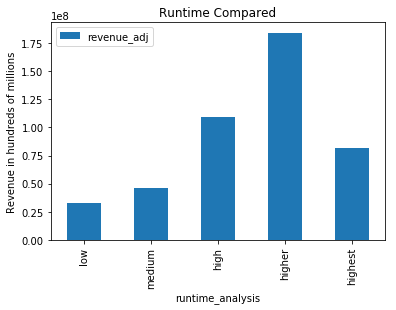

In [21]:
# Splitting runtimes based on the values 25%, 50% and max values to develop slots for plotting

runtime_levels = [90, 99,111,150,180,900]
runtime_names = ['low','medium','high','higher','highest']

df['runtime_analysis'] = pd.cut(df['runtime'],runtime_levels, labels=runtime_names)
df_runtime = df.groupby(['runtime_analysis'], as_index = False)['revenue_adj'].mean()
df_runtime.plot(kind ='bar', x = 'runtime_analysis')
plt.title('Runtime Compared')
plt.ylabel('Revenue in hundreds of millions')

> Movies with a londer runtime see a drop in revenue, this could be as most long movies tend to be independent movies that are not popular.
> Very few movies lie in the range of extremely low runtime of less than 90 mins
> Mean of the runtime is still relatively higher than 90 mins, so most movies in this database are more than 99 mins

<a id='eda'></a>
## Exploratory Data Analysis
    


### Research Question 2: Compare Genres of Movies released over the years

Text(0,0.5,'Count of movies')

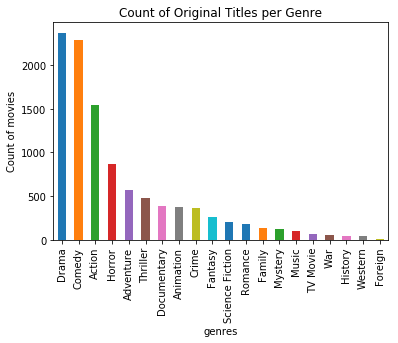

In [22]:
#Understand the total count of movies that have been released to understand top genres in the dataset in terms of count
#The dataset has high count of Drama, Comedy and Action movies which maybe indicative of genre popularity 
#but also may aid in analysis as quantity of data is higher
df.groupby('genres')['original_title'].count().sort_values(ascending = False).plot(kind= 'bar')
plt.title('Count of Original Titles per Genre')
plt.ylabel('Count of movies')

> The data from the RMDB contains a high number of Drama, Comedy, Action and Horror movies which might be indicative of the     real-world scenario where most movies have dramatic elements.
> In terms of genre it may be more beneficial to analyze the genres with higher count of data for better parity


In [23]:
genres_count = df.groupby(['release_year','genres'], as_index = False)['original_title'].count()
genres_count.sort_values('original_title', ascending = False, inplace = True)
genres_count.sort_values('release_year',inplace= True)
genres_count

,release_year,genres,original_title
2,1960,Comedy,7
3,1960,Crime,1
0,1960,Action,6
1,1960,Adventure,1
6,1960,Thriller,1
4,1960,Drama,4
5,1960,Horror,5
10,1961,Drama,7
16,1961,Western,3
8,1961,Adventure,2


In [24]:
#Calculating the total number of movies that have released each year
df_g = genres_count.groupby(['release_year'],as_index = False)['original_title'].sum() 
df_g.rename(lambda x: x+"_total",axis = 'columns', inplace = True)
df_g

,release_year_total,original_title_total
0,1960,25
1,1961,28
2,1962,29
3,1963,29
4,1964,41
5,1965,34
6,1966,42
7,1967,33
8,1968,34
9,1969,29


In [25]:
#including 
df4= pd.merge(genres_count,df_g, how = 'inner', left_on = 'release_year',right_on = 'release_year_total')
# Drop additional year column previously used for verification
df4.drop('release_year_total', axis = 'columns',inplace = True)
df4

,release_year,genres,original_title,original_title_total
0,1960,Comedy,7,25
1,1960,Crime,1,25
2,1960,Action,6,25
3,1960,Adventure,1,25
4,1960,Thriller,1,25
5,1960,Drama,4,25
6,1960,Horror,5,25
7,1961,Drama,7,28
8,1961,Western,3,28
9,1961,Adventure,2,28


In [26]:
#Adding Column to determine the percentage of movies that are 
df4['PercentofTotal'] = df4['original_title']/df4['original_title_total']*100
df4

,release_year,genres,original_title,original_title_total,PercentofTotal
0,1960,Comedy,7,25,28.000000
1,1960,Crime,1,25,4.000000
2,1960,Action,6,25,24.000000
3,1960,Adventure,1,25,4.000000
4,1960,Thriller,1,25,4.000000
5,1960,Drama,4,25,16.000000
6,1960,Horror,5,25,20.000000
7,1961,Drama,7,28,25.000000
8,1961,Western,3,28,10.714286
9,1961,Adventure,2,28,7.142857


In [27]:
#Plot total count of movies per year for popular Genres
drama = df4.query('genres=="Drama"')
action = df4.query('genres=="Action"')
comedy = df4[df4['genres']=='Comedy']
horror = df4[df4['genres']=='Horror']
documentary = df4[df4['genres']=='Documentary']
thriller = df4[df4['genres']=='Thriller']
documentary

,release_year,genres,original_title,original_title_total,PercentofTotal
64,1966,Documentary,1,42,2.380952
70,1967,Documentary,1,33,3.030303
113,1970,Documentary,2,38,5.263158
144,1973,Documentary,1,47,2.127660
155,1974,Documentary,1,41,2.439024
177,1976,Documentary,1,42,2.380952
192,1977,Documentary,1,55,1.818182
205,1978,Documentary,3,59,5.084746
239,1981,Documentary,2,75,2.666667
249,1982,Documentary,1,76,1.315789


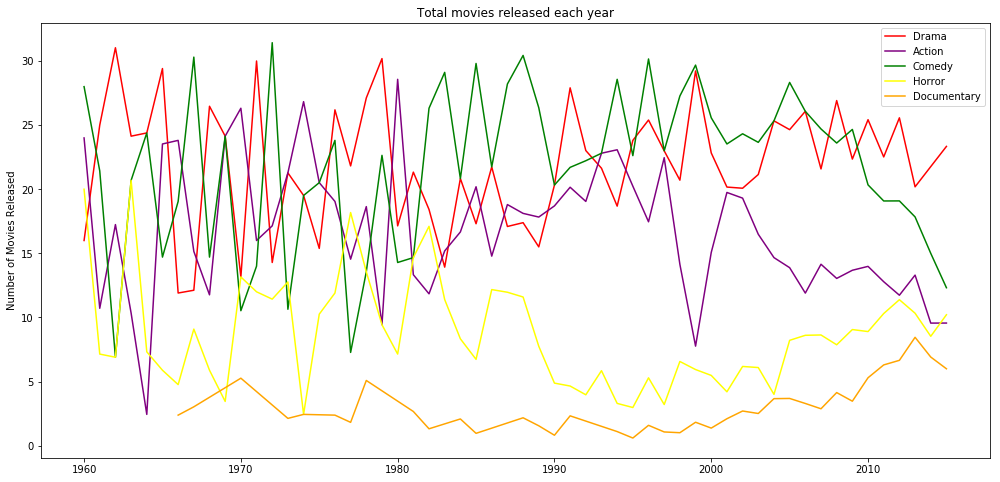

In [28]:
plt.figure(figsize=(17,8))
plt.plot(drama['release_year'],drama['PercentofTotal'], color = 'red', label = 'Drama')
plt.plot(action['release_year'], action['PercentofTotal'], color = 'purple', label = 'Action')
plt.plot(comedy['release_year'], comedy['PercentofTotal'], color = 'green', label = 'Comedy')
plt.plot(horror['release_year'], horror['PercentofTotal'], color = 'yellow', label = 'Horror')
plt.plot(documentary['release_year'], documentary['PercentofTotal'], color = 'orange', label = 'Documentary')
plt.title('Total movies released each year')
plt.ylabel('Number of Movies Released')
plt.legend()

1. It was important to look at the percentage of movies as the count of movies themselves did not lead to clear results for analysis.
2. Though the data has some spikes it is easy to see that drama movies have been popular throughout
3. Action movie count have dropped in the recent years but this could be due to the fact that 80s and 90s saw an explosion of violent movies and genres have grown diverse

### Research Question 2  (Analyze Revenue Based on Genres)

Text(0,0.5,'Revenue in hundreds of millions')

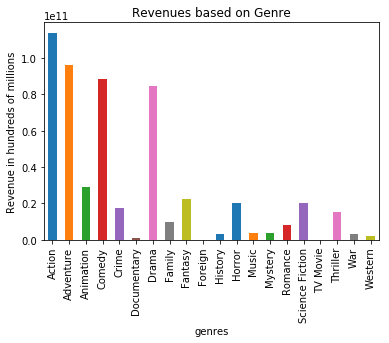

In [73]:
# Exploring  adjusted revenue to account for inflation while calculating the movie

adj_revenues = df.groupby('genres')['revenue_adj'].sum()
adj_revenues.plot(kind='bar')
plt.title('Revenues based on Genre')
plt.ylabel('Revenue in hundreds of millions')

1. Surprisingly, even though action movies are thirs in count in the dataset the top grossing movies are still Action.
2. Adventure and Action movies have the highest revenue per movie
3. Comedy and Drama rank a close 3 and 4 but this could be skewed by the fact that they are also the highest presence in terms of count in the data
4.  Animation movies are fifth in revenue even though the count is not even 500 in a 10000 count database thus demonstrating popularity of the animation genre.

<a id='conclusions'></a>
## Conclusions

Question 1: Runtime Vs Revenue
> Runtime was compared in different elevels based on 25%, 50% percentile values and some additional levels added by trial and error. The conclusions are:
1. The revenue peaks when the runtime is in between 150 to 180 mins which is the sweet spot for the runtime in terms of earning movie.
2. Ideal length os a movie that earns most dollars is between 111 and 180 after which the earnings start dwindling again.

Question 2: Genre wise break up of the main genres of movies over the years

> The total count of movies shows that Drama, Action, Comedy and Horror genres have the most mentions in our dataset
> Genre wise chart of top genres show that
1.	Documentary: There has been a sudden explosion in the number of documentary films made since 2010 based on the data in the rmdb database.
2.	Drama: The percentage of drama movies being released has remained relatively consistent with an average of about 25% of total movies made being drama 
3. Action movies have been dwindling in count in the last decade with the number or action movies being made decreasing compared ot the 80s and the 90s
4. Comedy movies had increased to 30% and above in the 1990s and 2000s but have dropped sharply in count since the 2010s.

Question 3
>Revenue based on Genres, Which movie genres earn the most money
1. The bar chart was plotted using values from adjusted revenue instead of revenues so that we can take the inflation into consideration while performing our analysis
2. The chart in Fig 2 shows that in the dataset provided action movies have earned the most at the box office. Even though action movies are only third in the count of movies in the database they handily outrank other genres.
3. It can be clearly asserted that action movies earn more than the other genres, the second most grossing genre is adventure which also has action elements. This further demonstrates that Hollywood action movies are extremely popular.
4. The next on the peking order are drama and comedy but that is not of much surprise as they are the highest count of movies on the list.

Limitations
1. The list is not a comprehensive list of movies release and there is no information as to how the movies were selected.
2. Drama, Comedy, Action and Horror movies form a huge majority of the movies covering almost 70% of the data while the other genres have limited presence.
3. It is evident upon doing a simple count that the data contains more movies for the recent years and movies from earlier much smaller with a skew ranging from 25 in 1960 to 680 for 2015
4. Any time based analysis maybe skewed due to the missing count of older movies.
5. Not a huge quantity of Foreign films which form a huge part of any movie database, which shows it is not a completely representative of world cinema but more of a hollywood based dataset.
6. Cast field is unwieldy and probably should only include main leads so that easy analysis of most saleable stars can be performed.



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])